<a href="https://colab.research.google.com/github/fedemoss/HelmholtzCage/blob/main/Variaciones_en_la_distancia_entre_bobinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**El objetivo de este código es estudiar como varía la homogeneidad para las bobinas cuadradas y circulares al modificar la distancia entre ellas**

In [ ]:
import math
import numpy as np
from scipy.integrate import quad
from numpy import sqrt, sin, cos, pi
from matplotlib import pyplot as plt

In [ ]:
## Constantes:
## Todo está en SI

N = 40  ## número de vueltas
I = 1   ## corriente
u0 = 1.256637062* 10 ** (-6)  ## permeabilidad magnética del vacio
C = u0 * N * I / (4 * np.pi)  

**DEFINICIÓN CAMPO DE JAULA CIRCULAR (ES PARA UN PAR CON SEPARACIÓN D, HAY QUE INTEGRAR ESTAS EXPRESIONES)**

In [ ]:
## Término que aparece en común para todos los campos

def terminoDivisorup(u, z, x, y, r, d):
    return ((z + d/2)**2 + (x - r * cos(u))**2 + (y - r * sin(u))**2)**(3/2)
  
def terminoDivisordown(u, z, x, y, r, d):
    return ((z - d/2)**2 + (x - r * cos(u))**2 + (y - r * sin(u))**2)**(3/2) 

## Campo en la dirección axial para las dos bobinas en cartesianas (Bz)

def dBzup(u, z, x, y, r, d):
    return C * r * (r - x * cos(u) - y * sin(u)) / terminoDivisorup(u, z, x, y, r, d)

def dBzdown(u, z, x, y, r, d):
    return C * r * (r - x * cos(u) - y * sin(u)) / terminoDivisordown(u, z, x, y, r, d) 

## Componente x del campo (par de bobinas)

def dBxup(u, z, x, y, r, d):
    return C * r  * (z + d/2) * cos(u)/terminoDivisorup(u, z, x, y, r, d)
 
def dBxdown(u, z, x, y, r, d):
    return C * r (z - d/2) * cos(u)/terminoDivisordown(u, z, x, y, r, d)

## Componente y del campo (par de bobinas)

def dByup(u, z, x, y, r, d):
    return C * r * (z + d/2) * sin(u)/terminoDivisorup(u, z, x, y, r, d)
 
def dBydown(u, z, x, y, r, d):
    return C * r * (z - d / 2) * sin(u)/terminoDivisordown(u, z, x, y, r, d)  

**DEFINICIÓN DE CAMPO DE JAULA CUADRADA (PARA UN PAR CON SEPARACIÓN D)**

In [ ]:
## Campo en el eje axial en cartesianas (Bz)
## La expresión es muy grande por lo tanto la separamos en varias partes
## bobinas a d/2 y -d/2 en el eje z con respecto al centro

def SBz1up(z, x, y, l, d):
    factorcomun = (x + l / 2)/((x + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz2up(z, x, y, l, d):
    factorcomun = (x - l / 2)/((x - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz3up(z, x, y, l, d):
    factorcomun = (y + l / 2)/((y + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y + l / 2) ** 2 + (z + d / 2) ** 2)     ## ojo acá
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz4up(z, x, y, l, d):
    factorcomun = (y - l / 2)/((y - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

## Este es la función que importa

def SBzup(z, x, y, l, d):
    return SBz1up(z, x, y, l, d) - SBz2up(z, x, y, l, d) + SBz3up(z, x, y, l, d) - SBz4up(z, x, y, l, d)

## Campo en el eje axial para la otra bobina

def SBz1down(z, x, y, l, d):
    factorcomun = (x + l / 2)/((x + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz2down(z, x, y, l, d):
    factorcomun = (x - l / 2)/((x - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz3down(z, x, y, l, d):
    factorcomun = (y + l / 2)/((y + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz4down(z, x, y, l, d):
    factorcomun = (y - l / 2)/((y - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

## Este es la otra función que importa

def SBzdown(z, x, y, l, d):
    return SBz1down(z, x, y, l, d) - SBz2down(z, x, y, l, d) + SBz3down(z, x, y, l, d) - SBz4down(z, x, y, l, d)

In [ ]:
## Campo en la componente x

def SBx1up(z, x, y, l, d):
    factorcomun = (z + d/2)/((x - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBx2up(z, x, y, l, d):
    factorcomun = (z + d/2)/((x + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBxup(z, x, y, l, d):
    return SBx1up(z, x, y, l, d) - SBx2up(z, x, y, l, d)

def SBx1down(z, x, y, l, d):
    factorcomun = (z - d/2)/((x - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBx2down(z, x, y, l, d):
    factorcomun = (z - d/2)/((x + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBxdown(z, x, y, l, d):
    return SBx1down(z, x, y, l, d) - SBx2down(z, x, y, l, d)

In [ ]:
## Campo en la componente y

def SBy1up(z, x, y, l, d):
    factorcomun = (z + d/2)/((y - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBy2up(z, x, y, l, d):
    factorcomun = (z + d/2)/((y + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y + l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SByup(z, x, y, l, d):
    return SBy1up(z, x, y, l, d) - SBy2up(z, x, y, l, d)

def SBy1down(z, x, y, l, d):
    factorcomun = (z - d/2)/((y - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBy2down(z, x, y, l, d):
    factorcomun = (z - d/2)/((y + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y + l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBydown(z, x, y, l, d):
    return SBy1down(z, x, y, l, d) - SBy2down(z, x, y, l, d)


**ESTUDIO DE ERRORES PRODUCIDOS POR LA VARIACIÓN DE LA DISTANCIA ENTRE BOBINAS (Bobina cuadrada)**

In [ ]:
# la distancia ideal está dada por d = 0.5445 * l
l = 1   # longitud de la bobina
d = np.linspace(0.5445 * l - 0.1, 0.5445 * l + 0.1, 51)  # intervalo de variación de d que contiene a la distancia ideal
dimensiony = 1  # tamaño del cubesat (luego se divide para obtenerlo en cm)
dimensionz = 1  # tamaño del cubesat
z = np.linspace(0, dimensionz / 20, 200) # vamos a ver puntos desde el centro, hasta el borde del cubesat
y = np.linspace(0, dimensiony / 20, 200)
Bzsquarez = np.zeros(len(z))  # array para el campo en z, variando en z (desde 0 a 5cm) x = 0, y = 0
Bzsquarey = np.zeros(len(y))  # "" "" variando y desde 0 a 5 cm (z = 0, x = 0)
HomogeneidadSz = np.zeros(len(d)) # array donde se guardan los valores de homogeneidad para la variación en z
HomogeneidadSy = np.zeros(len(d)) # ""  "" para la variación en y

## En cada iteración calculamos el campo (variando en y y en z), luego calculamos la homogeneidad
## y guardamos el máximo valor de la homogeneidad para una dada distancia, 
## así vamos completando el array de homogeneidad

for h in range(len(d)):
    for i in range(len(z)):
        Bzsquarez[i] = SBzdown(z[i], 0, 0, l, d[h]) + SBzup(z[i], 0, 0, l, d[h]) 
    
    Bz0 = SBzdown(0, 0, 0, l, d[h]) + SBzup(0, 0, 0, l, d[h])
    HomogeneidadSz[h] = max(abs(Bzsquarez - Bz0) / abs(Bz0)) * 10 ** 6  ## lo queremos en micro tesla

for h in range(len(d)):
    for i in range(len(y)):
        Bzsquarey[i] = SBzdown(0, 0, y[i], l, d[h]) + SBzup(0, 0, y[i], l, d[h])
    Bz0 = SBzdown(0, 0, 0, l, d[h]) + SBzup(0, 0, 0, l, d[h])
    HomogeneidadSy[h] = max(abs(Bzsquarey - Bz0) / abs(Bz0)) * 10 ** 6


(0.0, 500.0)

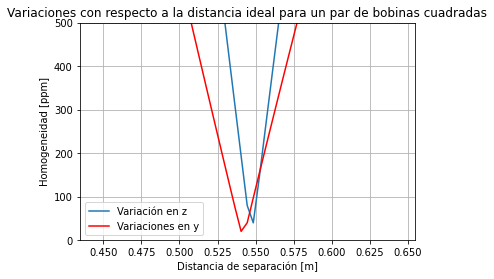

In [ ]:
## gráfico de homogeneidad versus distancia de separación para bobinas cuadradas

plt.plot(d, HomogeneidadSz)
plt.plot(d, HomogeneidadSy, "red")
plt.xlabel("Distancia de separación [m]")
plt.ylabel ("Homogeneidad [ppm]")
plt.legend(['Variación en z', 'Variaciones en y'])
plt.title('Variaciones con respecto a la distancia ideal para un par de bobinas cuadradas')
plt.grid()
plt.ylim(0, 500)

In [ ]:
# la distancia ideal está dada por d = r
r = 0.5
dcircle = np.linspace(r - 0.1, r + 0.1, 51)  # intervalo de variación de d con respecto a la distancia ideal
dimensiony = 1  # tamaño del cubesat (luego se divide para obtenerlo en cm)
dimensionz = 1  # tamaño del cubesat
z = np.linspace(0, dimensionz / 20, 200) ## vamos a ver puntos desde el centro, hasta el borde del cubesat
y = np.linspace(0, dimensiony / 20, 200)
Bzcirclez = np.zeros(len(z))  # array para el campo en z, variando en z
Bzcircley = np.zeros(len(y))  # "" "" variando y
HomogeneidadCz = np.zeros(len(dcircle)) # array donde se guardan los valores de homogeneidad para la variación en z
HomogeneidadCy = np.zeros(len(dcircle)) # ""  "" para la variación en y

## lo mismo que antes, pero integrando numéricamente

for h in range(len(dcircle)):
  for i in range(len(z)):
    ## integral numérica en cuadraturas
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], 0, 0, r, dcircle[h])) + quad(dBzdown, 0, 2*np.pi, args=(z[i],0 ,0 ,r, dcircle[h]))   
    Bzcirclez[i] = (Lz[0] + Lz[2]) * 10 **6 
  Bz0 = Bzcirclez[0] # Campo en el centro
  # Cálculo de la homogeneidad
  HomogeneidadCz[h] = max(abs(Bzcirclez - Bz0) / abs(Bz0)) * 10 ** 6 

for h in range(len(dcircle)):
  for i in range(len(y)):
    ## integral numérica en cuadraturas
    Ly = quad(dBzup, 0, 2*np.pi, args=(0, y[i], 0, r, dcircle[h])) + quad(dBzdown, 0, 2*np.pi, args=(0, y[i], 0, r, dcircle[h]))   
    Bzcircley[i] = (Ly[0] + Ly[2]) * 10 **6 
    
  Bz0 = Bzcircley[0]
  HomogeneidadCy[h] = max(abs(Bzcircley - Bz0) / abs(Bz0)) * 10 ** 6  

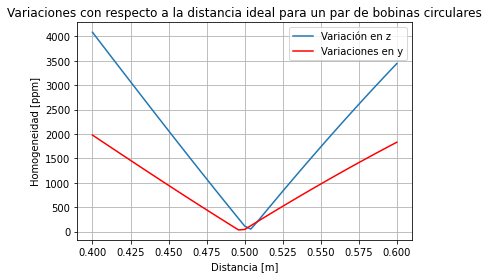

In [ ]:
## Gráfico de homogeneidad para variaciones en la distancia de separación para bobinas circulares
## Se ve que la distancia ideal depende del punto de observación ya que solo vale en el centro (aunque el corrimiento es despreciable)
plt.plot(dcircle, HomogeneidadCz)
plt.plot(dcircle, HomogeneidadCy, "red")
plt.xlabel("Distancia [m]")
plt.ylabel ("Homogeneidad [ppm]")
plt.legend(['Variación en z', 'Variaciones en y'])
plt.title('Variaciones con respecto a la distancia ideal para un par de bobinas circulares')
plt.grid()
#plt.ylim(0, 500)

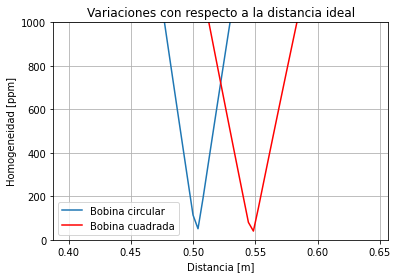

In [ ]:
## Gráfico comparativo de homogeneidad en función de la distancia para la bobina circular y la cuadrada

plt.plot(dcircle, HomogeneidadCz)
plt.plot(d, HomogeneidadSz, "red")
plt.xlabel("Distancia [m]")
plt.ylabel ("Homogeneidad [ppm]")
plt.legend(['Bobina circular', 'Bobina cuadrada'])
plt.title('Variaciones con respecto a la distancia ideal')
plt.ylim(0, 1000)
plt.grid()